## DA5401 Assignment #2
<br>
Let’s rollup our sleeves to get into the first data science task, where we try to model two cyber
physical tasks. The first physical system in a suspended spring with an unknown load at the end.
The second physical system is a stock price tracker. Our goal here is a) to model the harmonic
oscillation of the spring and b) to forecast the stock price at a future timeframe. The supplied
dataset consists of two columns representing both physical systems (call them ‘y1’ and ‘y2’).
Assume that the data points are sampled at constant time intervals (call it ‘x’); the scale does not
matter. The visualization of the data points, assuming the same time scale, will look like below.

Task 1 [20 points]
Let’s consider the ‘y2’ dataset against time ‘x’. Fit a linear model y2 = mx that minimizes the SSE.
Note that there is no need for the ‘c’, as you observe that the trend line (linear model) is passing
through ‘0’ (origin).
1. Implement the OLS closed form solution using numpy’s matrix operators to find the value
of ‘m’ that minimizes SSE.
2. Implement a linear search (the single parameter search version of grid search) for m = tan θ,
where θ in [0, 60] in steps of 5 degrees and measure the SSE at every choice of θ. Create a
plot that shows SSE vs θ. Report the θ, that minimizes SSE.
3. Implement the solution using sklearn’s LinearRegression class.
4. Compare the estimated ‘m’ values through the above three methods and justify the
differences if there are.

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from math import log, tan, pi
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [3]:
data  = pd.read_csv('Assignment2.data', sep='\t')
data.head()

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47


In [4]:
data.describe()

,SpringPos,StockPrice
count,226.000000,226.000000
mean,3.785221,14.187743
std,10.704778,7.447450
min,-19.910000,0.670000
25%,-3.960000,8.355000
50%,4.195000,13.970000
75%,11.295000,19.632500
max,26.100000,30.050000


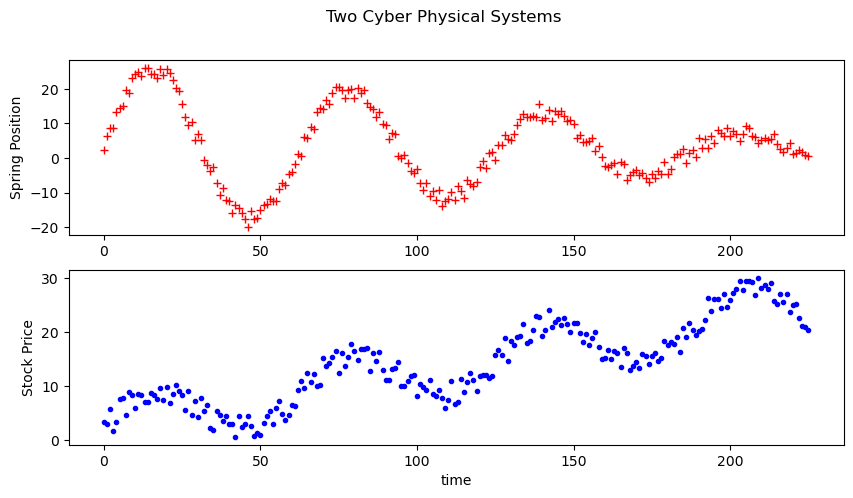

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Two Cyber Physical Systems')
fig.set_figwidth(10)
fig.set_figheight(5)

ax1.plot(data.SpringPos, 'r+')
ax1.set_ylabel('Spring Position')
ax2.plot(data.StockPrice, 'b.')
ax2.set_ylabel('Stock Price')
ax2.set_xlabel('time')

plt.show()

### transform the data into matrices

In [6]:
y2 = pd.DataFrame({"x":range(226), "y":data.StockPrice})
y2.head()

,x,y
0,0,3.48
1,1,2.99
2,2,5.86
3,3,1.79
4,4,3.47


In [7]:
yy = np.array(y2.y) 
xx = np.expand_dims(y2.x, 1)

In [8]:
print(yy.shape)
print(xx.shape)

(226,)
(226, 1)


1. Implement the OLS closed form solution using numpy’s matrix operators to find the value
of ‘m’ that minimizes SSE.

### run the closed form solution to estimate the beta parameter.

In [9]:
numerator = np.matmul(np.transpose(xx), yy)
denom = np.matmul(np.transpose(xx), xx)
denom_inv = np.linalg.inv(denom)
beta = np.matmul(denom_inv, numerator)
print("Beta = ", beta[0])
sse = np.sum((xx*beta[0] - np.expand_dims(yy,1))**2)
print("SSE = ", sse)

Beta =  0.11899412514961835
SSE =  3850.3354330802345


In [10]:
print(beta.shape)
print(sse.shape)

(1,)
()


In [11]:
# estimate the value of the beta vector assuming that X is made of independent features.
def estimateBeta(X, y):
    numerator = np.matmul(np.transpose(X), y)
    denom = np.matmul(np.transpose(X), X)
    denom_inv = np.linalg.inv(denom)
    beta = np.matmul(denom_inv, numerator)
    return beta

# create a helper that would estimate yhat from X and beta.
def predict(beta, X):
    # reshape the input to a matrix, if it is appearing like an 1d array.
    if len(X.shape) != 2:
        X = np.expand_dims(X,1)
    # convert the beta list in to an array.
    beta = np.array(beta)
    # print(X.shape)
    # print(beta.shape)
    # print(len(beta.shape))
    if len(beta.shape) == 0:
        beta = np.expand_dims(beta, 0)
    
    # perform estimation of yhat.
    
    return np.matmul(X, beta)

# compute the sum of squared error between y and yhat.
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

2. Implement a linear search (the single parameter search version of grid search) for m = tan θ,
where θ in [0, 60] in steps of 5 degrees and measure the SSE at every choice of θ. Create a
plot that shows SSE vs θ. Report the θ, that minimizes SSE.


In [12]:
tan_list = [tan(x * pi / 180) for x in range(0, 61, 5)]
print(tan_list)
print(tan(45 * pi / 180))
print(SSE(yy, predict(tan_list[0], xx)))

[0.0, 0.08748866352592401, 0.17632698070846498, 0.2679491924311227, 0.36397023426620234, 0.4663076581549986, 0.5773502691896257, 0.7002075382097097, 0.8390996311772799, 0.9999999999999999, 1.19175359259421, 1.4281480067421144, 1.7320508075688767]
0.9999999999999999
57971.5195


[57971.5195, 7644.253463286041, 16414.204300757367, 88656.38097289258, 233234.64823709434, 464912.6864159496, 806862.9417290995, 1295032.4609382832, 1985872.5235785348, 2970551.8794999984, 4402516.076549392, 6554700.170409569, 9949095.786187291]


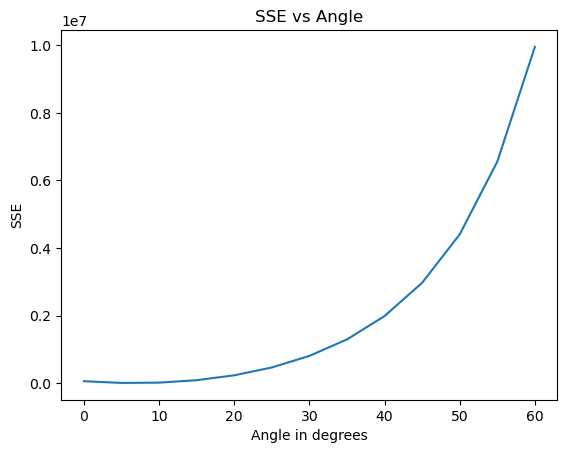

In [13]:
sse_list = [SSE(yy, predict(tan_val, xx)) for tan_val in tan_list]
print(sse_list)
plt.plot(range(0, 61, 5), sse_list)
plt.xlabel('Angle in degrees')
plt.ylabel('SSE')
plt.title('SSE vs Angle')
plt.show()


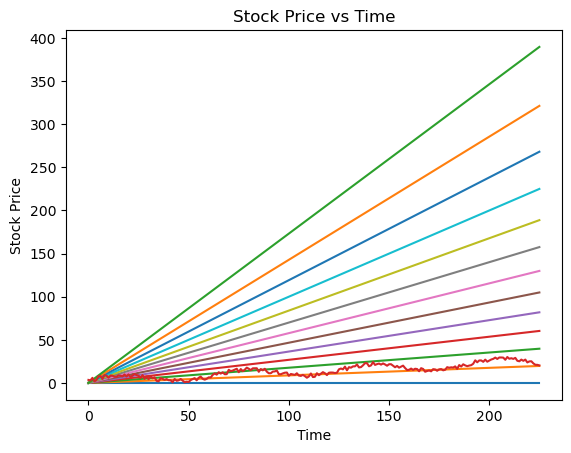

In [14]:
# plot all lines with tan values.
for tan_val in tan_list:
    plt.plot(xx, predict(tan_val, xx))
plt.plot(xx, yy)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price vs Time')
plt.show()


In [15]:
# Minimum SSE
min_sse = np.argmin(sse_list)
print("Minimum SSE is at angle = ", min_sse*5)
print("Minimum SSE = ", sse_list[min_sse])
print(xx)

Minimum SSE is at angle =  5
Minimum SSE =  7644.253463286041
[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]


3. Implement the solution using sklearn’s LinearRegression class.


In [16]:
sklearn_model = linear_model.LinearRegression().fit(xx, yy)
print("sklearn Beta = ", sklearn_model.coef_)
print("sklearn SSE = ", SSE(yy, sklearn_model.predict(xx)))


sklearn Beta =  [0.09782485]
sklearn SSE =  3274.298469663405


4. Compare the estimated ‘m’ values through the above three methods and justify the
differences if there are.

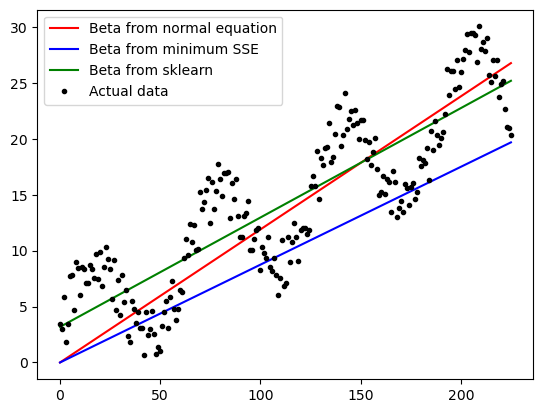

In [17]:
# plot all three m or beta
plt.plot(xx, predict(beta[0], xx), 'r', label='Beta from normal equation')
plt.plot(xx, predict(tan_list[min_sse], xx), 'b', label='Beta from minimum SSE')
plt.plot(xx, sklearn_model.predict(xx), 'g', label='Beta from sklearn')
plt.plot(xx, yy, 'k.', label='Actual data')
plt.legend()
plt.show()


Task 2 [15 points]
You will notice that the linear model is an ok fit for the y2. What should be the mathematical model
of stock price dataset? If you notice the periodicity in the data, you should factor that in your
mathematical model using an appropriate function that’s periodic. The challenge here is; the trend
of the magnitude is also increasing, which you confirmed in your previous task. So, the math
model should consider both properties.
1. Split your data into Train, Eval & Test.
◦ Interpolation: When you randomly split the data into train, eval and test; your test and
evaluation data points may be inside the data range (time range). When you can predict
those points correctly, you are essentially recovering missing data in the regression line.
This is also called the interpolation problem.
◦ Extrapolation: In this scenario, the test and eval points should be outside the time range
of the training data. If your model is a good fit, and when you predict the data point
outside the range, you are essentially extrapolating the regression line. This is also
called the “Forecasting” task.
2. Implement the regression model (OLS or LinearRegression or equivalent) using appropriate
feature transformation so that the SSE is lower than that of Task 1.
3. Train the regression model for interpolation and evaluate the SSE.
4. Train the regression model for extrapolation and evaluate the SSE.

### Let's model the periodicity

Let's borrow the slope information from the fit to set up the scale of the time axis.

Instead of using $x$ in integer scale, we shall use the floating point scale as $x_1 \leftarrow \beta_0 * x$

Likewise, let's create a new data dimension to capture the periodicity as $x_2 \leftarrow sin(x_1)$

Based on the expanded feature space, now let's try to model $\hat{y} = m_1 x_1 + m_2 x_2$, note that we don't have to use the intercept $c$ as our previous linear model passed through the origin.


In [18]:
x1 = round(y2.x*beta[0],2) # beta[0] instead of beta2[1]
x2 = np.sin(x1)

y21 = pd.DataFrame({"bias":np.ones(226),"x":range(226), "x1":x1, "x2":x2, "y":data.StockPrice})
y21.head(10)

,bias,x,x1,x2,y
0,1.0,0,0.00,0.000000,3.48
1,1.0,1,0.12,0.119712,2.99
2,1.0,2,0.24,0.237703,5.86
3,1.0,3,0.36,0.352274,1.79
4,1.0,4,0.48,0.461779,3.47
5,1.0,5,0.59,0.556361,7.73
6,1.0,6,0.71,0.651834,7.83
7,1.0,7,0.83,0.737931,4.70
8,1.0,8,0.95,0.813416,8.97
9,1.0,9,1.07,0.877201,8.43


### create the data matrices from the data frame

2. Implement the regression model (OLS or LinearRegression or equivalent) using appropriate
feature transformation so that the SSE is lower than that of Task 1.

In [19]:
xx = np.array(y21[['bias', 'x1', 'x2']])
xx2 = np.array(y21['x'])
xx3 = np.array(y21[['bias', 'x', 'x1', 'x2']])
yy = np.array(y2.y) 
print(xx2.shape)
print(xx2[:2])

(226,)
[0 1]


In [20]:
beta3 = estimateBeta(xx, yy)
print("Beta = ", beta3)
yhat3 = predict(beta3, xx)
loss = SSE(yy, yhat3) #np.sum((np.matmul(xx,beta) - yy)**2)
# print("SSE = ", sse)
print("SSE =", loss)

Beta =  [ 3.33633535  0.81432327 -1.18446444]
SSE = 3116.636235828423


(157, 4)
(23, 4)
(46, 4)
[175. 157. 172. 138. 132. 183.  36. 152. 137.  78.  86. 182.  17. 218.
  67. 117. 194. 126.  97. 133. 188.  52. 185. 107. 143.  49.  31.  93.
  99. 197. 161. 164.   1. 103. 106. 113.  44.  40. 118.  18.  87. 179.
 195.  35. 208.  65.  12.  39.  29. 146. 219. 224.   0.   8. 205. 149.
  15.  45. 225.  13.  79.  95. 115. 141. 142. 198. 162.  58.  20.  71.
 190. 109. 144.  22. 206. 181. 210. 121. 120.  80. 124.   2.  91. 204.
 111.  74. 215.  47. 180.  24. 187. 170.  63.  59. 125. 135. 165. 112.
 166.  27.  64.  54.  82. 186. 155.  69. 119.  70. 156.  38. 108. 174.
 116.  94.  14. 222. 207. 158.  23.  41. 168. 122. 150. 199.   7. 177.
  16.  68. 209. 139. 200. 189. 193. 147.  19.   9. 105.  11. 129. 100.
 202.  98.  81. 154. 123.  92.  33.   5. 169. 203.  85.  30.  56.  72.
 221. 131. 153.]
Min Index of Train =  0.0
Max Index of Train =  225.0
Min Index of Eval =  4.0
Max Index of Eval =  217.0
Min Index of Test =  3.0
Max Index of Test =  223.0


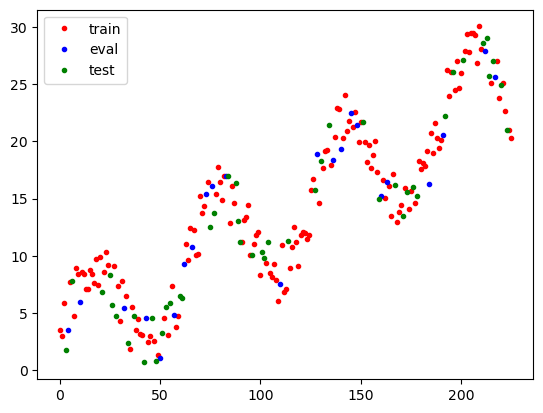

In [21]:
# split to train, eval, test
# xx2_train, xx2_test, y_train, y_test = train_test_split(xx2, yy, test_size=0.2, random_state=5)
# xx2_train, xx2_eval, y_train, y_eval = train_test_split(xx2_train, y_train, test_size=0.1/0.8, random_state=5)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xx3, yy, test_size=0.2, random_state=5)
x_train, x_eval, y_train, y_eval = train_test_split(x_train, y_train, test_size=0.1/0.8, random_state=5)
print(x_train.shape)
print(x_eval.shape)
print(x_test.shape)
# get indexes of splits 
train_index = x_train[:,1]
eval_index = x_eval[:,1]
test_index = x_test[:,1]
print(x_train[:,1])
# train_index = xx2_train[:]
# eval_index = xx2_eval[:]
# test_index = xx2_test[:]
# print(xx2_train[:])

# train_index = np.argsort(train_index)
# eval_index = np.argsort(eval_index)
# test_index = np.argsort(test_index)
print("Min Index of Train = ", min(train_index))    
print("Max Index of Train = ", max(train_index))
print("Min Index of Eval = ", min(eval_index))
print("Max Index of Eval = ", max(eval_index))
print("Min Index of Test = ", min(test_index))
print("Max Index of Test = ", max(test_index))


# plot the data
plt.plot(train_index, y_train, 'r.', label='train')
plt.plot(eval_index, y_eval, 'b.', label='eval')
plt.plot(test_index, y_test, 'g.', label='test')
plt.legend()
plt.show()


In [22]:
# remove column 1
x_train = np.delete(x_train, 1, 1)
x_eval = np.delete(x_eval, 1, 1)
x_test = np.delete(x_test, 1, 1)


In [23]:
poly_transformer = PolynomialFeatures(degree = 30)
X_poly = poly_transformer.fit_transform(xx)
model = linear_model.LinearRegression().fit(X_poly, yy)
print("Intercept=", model.intercept_, "Beta = ", model.coef_)
yhat4 = model.predict(X_poly)
loss = SSE(yy, yhat4)
print("SSE = ", loss)

Intercept= 8.667953113886503 Beta =  [ 3.57879446e-29 -1.51219005e-29 -2.79481539e-29 ...  6.92038062e-35
  6.13103195e-35  5.49194523e-35]
SSE =  3111.3399581009858


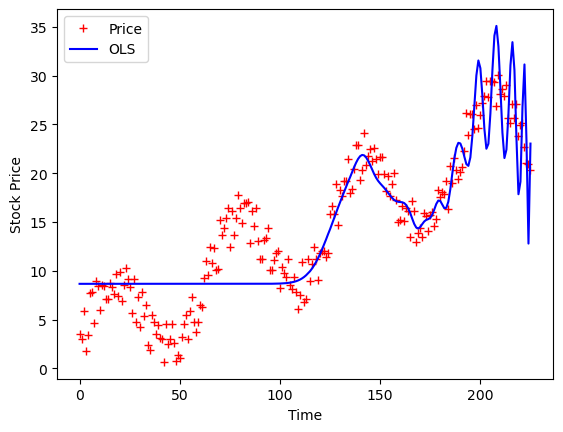

In [24]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat4, 'b-')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.legend(['Price', 'OLS'], loc='upper left')
plt.show()

In [45]:
sse_lt = []
for i in range(20):
    poly_transformer = PolynomialFeatures(degree = i)
    X_poly = poly_transformer.fit_transform(x_train)
    model = linear_model.LinearRegression().fit(X_poly, y_train)
    # check eval
    X_poly_eval = poly_transformer.fit_transform(x_eval)
    yhat4 = model.predict(X_poly_eval)
    loss = SSE(y_eval, yhat4)
    sse_lt.append(loss)
best_deg = np.argmin(sse_lt)
poly_transformer = PolynomialFeatures(degree = best_deg)
X_poly = poly_transformer.fit_transform(x_train)
model = linear_model.LinearRegression().fit(X_poly, y_train)
X_poly_test = poly_transformer.fit_transform(x_test)
yhat4 = model.predict(X_poly_test)
loss = SSE(y_test, yhat4)
print("Best degree = ", best_deg)
print("SSE on test data:", loss)




Best degree =  0
SSE on test data: 5500.09026192949


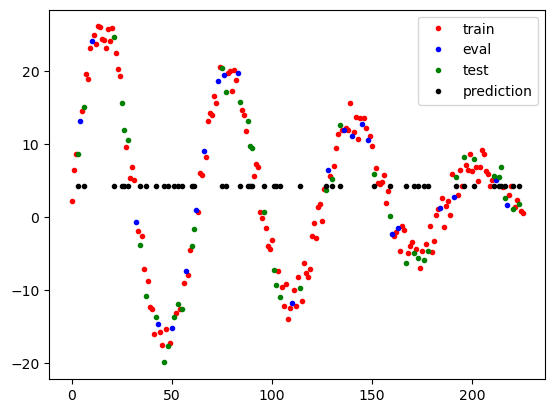

In [43]:
# plot the data
plt.plot(train_index, y_train, 'r.', label='train')
plt.plot(eval_index, y_eval, 'b.', label='eval')
plt.plot(test_index, y_test, 'g.', label='test')
plt.plot(test_index, yhat4, 'k.', label='prediction')
plt.legend()
plt.show()


In [27]:
# split to train, eval, test for extrapolation.
n = xx3.shape[0]
train_eval_split = int(n*0.7)
eval_test_split = int(n*0.8)
xx3 = np.delete(xx3, 1, 1)
xe_train = xx3[:train_eval_split]
xe_eval = xx3[train_eval_split:eval_test_split]
xe_test = xx3[eval_test_split:]
ye_train = yy[:train_eval_split]
ye_eval = yy[train_eval_split:eval_test_split]
ye_test = yy[eval_test_split:]


In [28]:
sse_lt = []
for i in range(20):
    poly_transformer = PolynomialFeatures(degree = i)
    X_poly = poly_transformer.fit_transform(xe_train)
    model = linear_model.LinearRegression().fit(X_poly, ye_train)
    # check eval
    X_poly_eval = poly_transformer.fit_transform(xe_eval)
    yhat4 = model.predict(X_poly_eval)
    loss = SSE(ye_eval, yhat4)
    sse_lt.append(loss)
best_deg = np.argmin(sse_lt)
poly_transformer = PolynomialFeatures(degree = best_deg)
X_poly = poly_transformer.fit_transform(xe_train)
model = linear_model.LinearRegression().fit(X_poly, ye_train)
X_poly_test = poly_transformer.fit_transform(xe_test)
yhat4 = model.predict(X_poly_test)
loss = SSE(ye_test, yhat4)
print("Best degree = ", best_deg)
print("SSE on test data:", loss)


Best degree =  2
SSE on test data: 1312.511595660347


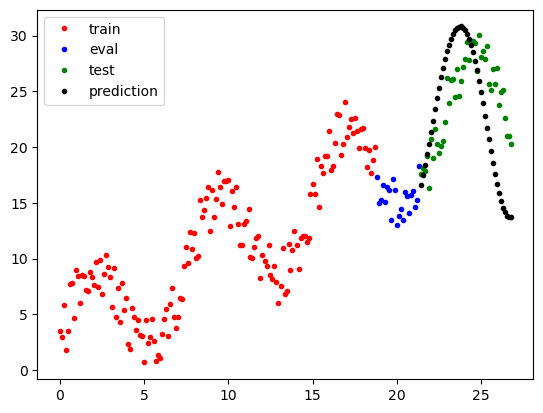

In [29]:
plt.plot(xe_train[:,1], ye_train, 'r.', label='train')
plt.plot(xe_eval[:,1], ye_eval, 'b.', label='eval')
plt.plot(xe_test[:,1], ye_test, 'g.', label='test')
plt.plot(xe_test[:,1], yhat4, 'k.', label='prediction')
plt.legend()
plt.show()


TASK 3 :(SPRING POSITION)
1. Having finished the mathematical models of stock price prediction, let’s switch to the mathematical 
model for approximating the oscillation of a loaded spring.  Here you notice that the oscillations 
have a constant time period, but the height of the wave is decreasing until cessation. You should 
repeat Task 2 on the spring system dataset.

In [30]:
y1 = pd.DataFrame({"x":range(226), "y":data.SpringPos})
y1.head()


,x,y
0,0,2.27
1,1,6.38
2,2,8.61
3,3,8.65
4,4,13.17


In [31]:
# x1 = round(y1.x,2)
# x1 = np.cos(range(y1.shape[0]))
x2 = np.sin(range(y1.shape[0]))
x3 = [i*x2[i] for i in range(y1.shape[0])]
y11 = pd.DataFrame({"bias":np.ones(y1.shape[0]),"x":range(y1.shape[0]), "x3":x3, "x2":x2, "y":data.SpringPos})
y11.head(10)

,bias,x,x3,x2,y
0,1.0,0,0.000000,0.000000,2.27
1,1.0,1,0.841471,0.841471,6.38
2,1.0,2,1.818595,0.909297,8.61
3,1.0,3,0.423360,0.141120,8.65
4,1.0,4,-3.027210,-0.756802,13.17
5,1.0,5,-4.794621,-0.958924,14.52
6,1.0,6,-1.676493,-0.279415,15.12
7,1.0,7,4.598906,0.656987,19.62
8,1.0,8,7.914866,0.989358,18.91
9,1.0,9,3.709066,0.412118,23.17


In [32]:
xx = np.array(y11[['bias', 'x', 'x3', 'x2']])
yy = np.array(y1.y)
print(xx.shape)
print(yy.shape)


(226, 4)
(226,)


In [33]:
beta3 = estimateBeta(xx, yy)
print("Beta = ", beta3)
yhat3 = predict(beta3, xx)
loss = SSE(yy, yhat3) #np.sum((np.matmul(xx,beta) - yy)**2)
print("SSE =", loss)

Beta =  [ 6.85165793e+00 -2.72421925e-02  1.98938305e-03 -1.86767150e-01]
SSE = 25067.063004053085


(157, 4)
(23, 4)
(46, 4)
[175. 157. 172. 138. 132. 183.  36. 152. 137.  78.  86. 182.  17. 218.
  67. 117. 194. 126.  97. 133. 188.  52. 185. 107. 143.  49.  31.  93.
  99. 197. 161. 164.   1. 103. 106. 113.  44.  40. 118.  18.  87. 179.
 195.  35. 208.  65.  12.  39.  29. 146. 219. 224.   0.   8. 205. 149.
  15.  45. 225.  13.  79.  95. 115. 141. 142. 198. 162.  58.  20.  71.
 190. 109. 144.  22. 206. 181. 210. 121. 120.  80. 124.   2.  91. 204.
 111.  74. 215.  47. 180.  24. 187. 170.  63.  59. 125. 135. 165. 112.
 166.  27.  64.  54.  82. 186. 155.  69. 119.  70. 156.  38. 108. 174.
 116.  94.  14. 222. 207. 158.  23.  41. 168. 122. 150. 199.   7. 177.
  16.  68. 209. 139. 200. 189. 193. 147.  19.   9. 105.  11. 129. 100.
 202.  98.  81. 154. 123.  92.  33.   5. 169. 203.  85.  30.  56.  72.
 221. 131. 153.]


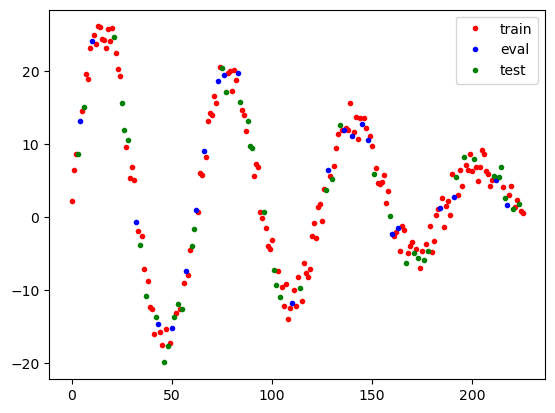

In [34]:
# split to train, eval, test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=5)
x_train, x_eval, y_train, y_eval = train_test_split(x_train, y_train, test_size=0.1/0.8, random_state=5)
print(x_train.shape)
print(x_eval.shape)
print(x_test.shape)
# get indexes of splits 
train_index = x_train[:,1]
eval_index = x_eval[:,1]
test_index = x_test[:,1]
print(x_train[:,1])


# plot the data
plt.plot(train_index, y_train, 'r.', label='train')
plt.plot(eval_index, y_eval, 'b.', label='eval')
plt.plot(test_index, y_test, 'g.', label='test')
plt.legend()
plt.show()


In [35]:
poly_transformer = PolynomialFeatures(degree = 30)
X_poly = poly_transformer.fit_transform(xx)
model = linear_model.LinearRegression().fit(X_poly, yy)
print("Intercept=", model.intercept_, "Beta = ", model.coef_)
yhat4 = model.predict(X_poly)
loss = SSE(yy, yhat4)
print("SSE = ", loss)


Intercept= 4.147613068428715 Beta =  [1.97998820e-59 4.51267780e-58 6.17335819e-58 ... 9.47583151e-66
 1.88331477e-66 3.74953799e-67]
SSE =  25630.945225282023


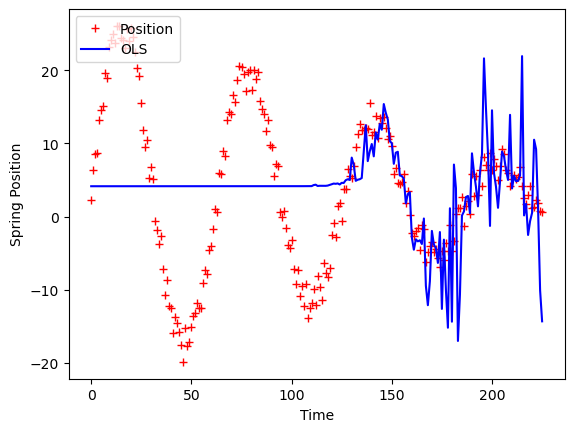

In [36]:
plt.plot(y1.x, y1.y, 'r+')
plt.plot(y1.x, yhat4, 'b-')
plt.ylabel('Spring Position')
plt.xlabel('Time')
plt.legend(['Position', 'OLS'], loc='upper left')
plt.show()


In [42]:
sse_lt = []
for i in range(60):
    poly_transformer = PolynomialFeatures(degree = i)
    X_poly = poly_transformer.fit_transform(x_train)
    model = linear_model.LinearRegression().fit(X_poly, y_train)
    # check eval
    X_poly_eval = poly_transformer.fit_transform(x_eval)
    yhat4 = model.predict(X_poly_eval)
    loss = SSE(y_eval, yhat4)
    sse_lt.append(loss)
best_deg = np.argmin(sse_lt)
poly_transformer = PolynomialFeatures(degree = best_deg)
X_poly = poly_transformer.fit_transform(x_train)
model = linear_model.LinearRegression().fit(X_poly, y_train)
X_poly_test = poly_transformer.fit_transform(x_test)
yhat4 = model.predict(X_poly_test)
loss = SSE(y_test, yhat4)
print("Best degree = ", best_deg)
print("SSE on test data:", loss)


Best degree =  0
SSE on test data: 5500.09026192949


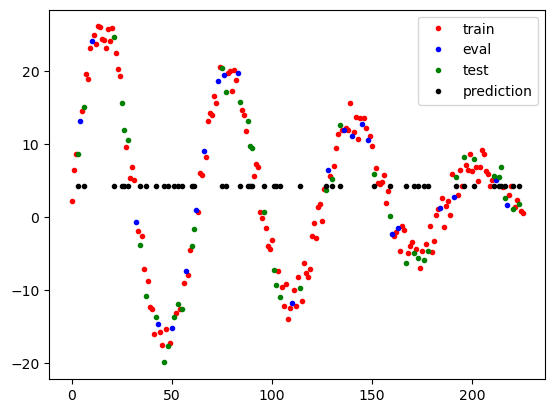

In [38]:
# plot the data
plt.plot(train_index, y_train, 'r.', label='train')
plt.plot(eval_index, y_eval, 'b.', label='eval')
plt.plot(test_index, y_test, 'g.', label='test')
plt.plot(test_index, yhat4, 'k.', label='prediction')

plt.legend()
plt.show()

In [39]:
# split to train, eval, test for extrapolation.
n = xx.shape[0]
train_eval_split = int(n*0.7)
eval_test_split = int(n*0.8)
# xx3 = np.delete(xx3, 1, 1)
xe_train = xx[:train_eval_split]
xe_eval = xx[train_eval_split:eval_test_split]
xe_test = xx[eval_test_split:]
ye_train = yy[:train_eval_split]
ye_eval = yy[train_eval_split:eval_test_split]
ye_test = yy[eval_test_split:]

In [40]:
sse_lt = []
for i in range(30):
    poly_transformer = PolynomialFeatures(degree = i)
    X_poly = poly_transformer.fit_transform(xe_train)
    model = linear_model.LinearRegression().fit(X_poly, ye_train)
    # check eval
    X_poly_eval = poly_transformer.fit_transform(xe_eval)
    yhat4 = model.predict(X_poly_eval)
    loss = SSE(ye_eval, yhat4)
    sse_lt.append(loss)
best_deg = np.argmin(sse_lt)
poly_transformer = PolynomialFeatures(degree = best_deg)
X_poly = poly_transformer.fit_transform(xe_train)
model = linear_model.LinearRegression().fit(X_poly, ye_train)
X_poly_test = poly_transformer.fit_transform(xe_test)
yhat4 = model.predict(X_poly_test)
loss = SSE(ye_test, yhat4)
print("Best degree = ", best_deg)
print("SSE on test data:", loss)


Best degree =  1
SSE on test data: 1182.8530898392642


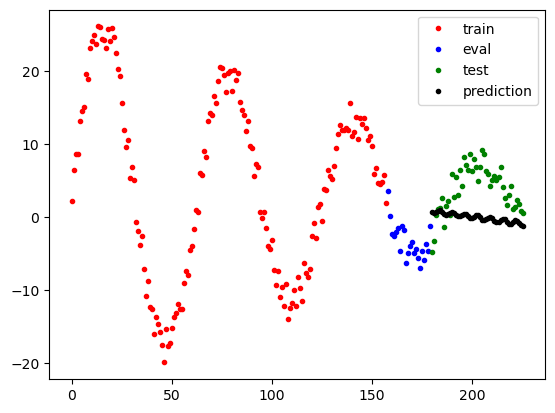

In [41]:
plt.plot(xe_train[:,1], ye_train, 'r.', label='train')
plt.plot(xe_eval[:,1], ye_eval, 'b.', label='eval')
plt.plot(xe_test[:,1], ye_test, 'g.', label='test')
plt.plot(xe_test[:,1], yhat4, 'k.', label='prediction')
plt.legend()
plt.show()
